# Teaching A Machine To Add

#### Introduction: 
In this project, I am examining a few machine learning models. With each of these models, I am asking the following questions: 
* How well will this model predict the addition of 2 numbers? 
* What if it were given imperfect data?
* How would more data relate to predictive ability?
    
The purpose of this study is to get a better understanding of how each of these models behave. 

#### Rules For This Experiment: 
1. No feature engineering or excluding outliers. Otherwise, the problem is solved before the machine learning model starts.
2. Default settings only. For the neural network, there is no default setting per se, so I've tried to keep things simple.

# Import Libraries

In [1]:
import random
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.0f}'.format)
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["axes.formatter.min_exponent"] = 10  # no scientific notation in graphs
plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = 10   # pad is in points... default is 6
import seaborn as sns
sns.set_theme()

# Classes to Generate Training and Test Data

In [2]:
class AddMe(list):
    '''
    makes a list of length list_size with x1, x2, and y
    sometimes y is random, but math_accuracy of the time y = x1 + x2
    this is an added list, along with some errors / noise 
    other notes:
    inherits from list 
    lists of lists works as a data structure for sklearn
    '''

    def __init__(self, list_size, math_accuracy):
        self.MIN_NUM = -100
        self.MAX_MUM = 100
        self.list_size = list_size
        self.math_accuracy = math_accuracy
        self.list_initialise(self.list_size, self.math_accuracy)
    
    def __str__(self):
        return f"{self.list_size} training numbers at {self.math_accuracy:.0%} accuracy"

    def list_initialise(self, list_size, math_accuracy):
        for i in range(list_size):
            # initialise x and y values
            x1 = random.randint(self.MIN_NUM, self.MAX_MUM)
            x2 = random.randint(self.MIN_NUM, self.MAX_MUM)
            
            # set y to be the addition of x1 and x2
            y = x1 + x2
            
            # set y to a random value if math_accuracy is exceeded
            if i / list_size >= math_accuracy:
                while y == x1 + x2:
                    # rand num * 2 so that plot and rand share the same domain
                    y = random.randint(self.MIN_NUM * 2, self.MAX_MUM * 2)
            
            self.append([x1, x2, y])

        # sort finished list so errors are not clustered
        self.sort()


class TestMe(list):
    '''
    makes a list of length list_size with random x1, x2
    to be used for testing
    '''

    def __init__(self, list_size):
        self.MIN_NUM = -100
        self.MAX_MUM = 100
        self.list_size = list_size
        self.list_initialise(self.list_size)

    def __str__(self):
        return f"{self.list_size} test numbers"

    def list_initialise(self, list_size):
        for i in range(list_size):
            # initialise x values
            x1 = random.randint(self.MIN_NUM, self.MAX_MUM)
            x2 = random.randint(self.MIN_NUM, self.MAX_MUM)
            self.append([x1, x2])
        

In [3]:
# Initialise Training Sets
# small, medium, and large, between 50% and 100% accuracy

small_100 = AddMe(100, 1)
small_99 = AddMe(100, 0.99)
small_90 = AddMe(100, 0.9)
small_75 = AddMe(100, 0.75)
small_50 = AddMe(100, 0.5)

medium_100 = AddMe(1000, 1)
medium_99 = AddMe(1000, 0.99)
medium_90 = AddMe(1000, 0.9)
medium_75 = AddMe(1000, 0.75)
medium_50 = AddMe(1000, 0.5)

large_100 = AddMe(10000, 1)
large_99 = AddMe(10000, 0.99)
large_90 = AddMe(10000, 0.9)
large_75 = AddMe(10000, 0.75)
large_50 = AddMe(10000, 0.5)


# Check Math Function

In [4]:
def check_math(inputlist):
    '''
    takes in list of list, x1, x2, and y
    returns number of rows, # times y = x1 + x2, # times y ~ x1 + x2, and mean square error
    ie, (rows, correct_when_rounded, correct, MSE)
    '''

    rows = 0
    correct_when_rounded = 0
    correct = 0
    MSE = 0

    for x in inputlist:
        rows += 1

        # correct_when_rounded needs to slice into np.array() for tensorflow        
        try:
            if round(x[0] + x[1]) == round(x[2]):
                correct_when_rounded += 1
        except:
            if round(x[0] + x[1]) == round(x[2][0]):
                correct_when_rounded += 1

        if x[0] + x[1] == x[2]:
            correct += 1
        else:
            MSE += (x[2] - (x[0] + x[1])) ** 2

    MSE = MSE / rows
    
    return rows, correct_when_rounded, correct, MSE


Sorry for all of the naked Excepts **¯\\\_(ツ)\_/¯**

# Import and Initialise ML Models

In [5]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# initialise all models
# just use default parameters
# tuning is likely to improve any of these models

# decision tree
dt_model = DecisionTreeClassifier()

# decision tree regressor
tr_model = DecisionTreeRegressor()

# naive Bayes
nb_model = GaussianNB()

# linear regression
lr_model = LinearRegression()

# random forest regressor
rf_model = RandomForestRegressor()

# xgboost
xgb_model = XGBRegressor()

# tensor flow (not "default", but only moderate tuning)
tf_width = 256  # lower values perform poorly
tf_dropout = 0  # seems to perform negatively in most cases
tf_model = Sequential()
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(1))
tf_model.compile(optimizer="rmsprop", loss="mse")

# Lists of Models and Training Sets

In [6]:
# set up lists of models / sets

list_of_models = [dt_model, tr_model, nb_model, lr_model, rf_model, xgb_model, tf_model]

training_sets = [small_100, small_99, small_90, small_75, small_50, 
                 medium_100, medium_99, medium_90, medium_75, medium_50, 
                 large_100, large_99, large_90, large_75, large_50]


# Functions: Train, Predict

In [7]:
def train_model(model, training_set):
    # split into X and y
    ind_var = [sublist[:2] for sublist in training_set]  # x1 and x2
    dep_var = [sublist[2] for sublist in training_set]  # y

    # fit to training set (np.array() for XGBoost)
    try:
        # verbose=0 for tensorflow
        model.fit(np.array(ind_var), np.array(dep_var), verbose=0)
    except:
        model.fit(np.array(ind_var), np.array(dep_var))
        
    return model


def predict_model(model, test_set):
    # uses np.array() for XGBoost
    try:
        # verbose=0 for tensorflow
        return model.predict(np.array(test_set), verbose=0)
    except:
        return model.predict(np.array(test_set))


def get_name_of_model(model):
    model_text = str(model).split("(")[0]
    if model_text[0] == "<":
        model_text = "Keras.TensorFlow"

    return model_text


# Train all models on all training sets and output prediction summary from check_math()

In [8]:
def fit_model_to_data(model, list_of_training_sets, n_tests):
    '''
    Takes in the ML model, a list of training sets, and the number of
    tests to perform. Checks math using check_math() from above.
    Uses np.array() to match input requirements for XGBoost; lists
    of lists work for sklearn models.
    '''
    
    # These are likely the same as the min and max above
    # but they don't need to be. Maybe try testing extreme values.
    MIN_TEST = -100
    MAX_TEST = 100

    # initialise an empty list 
    results = []

    for training_set in list_of_training_sets:

        # fit model
        fit_model = train_model(model, training_set)

        # test model
        test_set = TestMe(n_tests)
        predictions = predict_model(model, test_set)
        test_list = np.column_stack((test_set, predictions))
        
        # test predictions with check_math(inputlist)
        results.append(check_math(test_list))

    return results


In [9]:
%%time
n_model = 0
n_tests = 1000

dt_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(dt_results))

DecisionTreeClassifier
       0    1    2     3
0   1000   25   25   665
1   1000   23   23   830
2   1000   23   23  3379
3   1000   13   13  5990
4   1000   10   10 10474
5   1000   75   75    48
6   1000   66   66   163
7   1000   52   52  2838
8   1000   57   57  5278
9   1000   33   33  9854
10  1000  254  254     3
11  1000  243  243   112
12  1000  254  254  1573
13  1000  209  209  5635
14  1000  118  118 11708
Wall time: 689 ms


In [10]:
%%time
n_model = 1
n_tests = 1000

tr_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(tr_results))

DecisionTreeRegressor
       0    1    2     3
0   1000   23   23   449
1   1000   28   28   424
2   1000   17   17  3542
3   1000   19   19  5103
4   1000   14   14  9614
5   1000   72   72    37
6   1000   69   69   146
7   1000   66   66  2148
8   1000   62   62  4328
9   1000   34   34 11279
10  1000  273  273     3
11  1000  280  280   113
12  1000  236  236  2279
13  1000  197  197  5375
14  1000  135  133  9895
Wall time: 353 ms


In [11]:
%%time
n_model = 2
n_tests = 1000

nb_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(nb_results))

GaussianNB
       0   1   2    3
0   1000   8   8 4061
1   1000  13  13 1735
2   1000   4   4 3879
3   1000  17  17 2029
4   1000   6   6 6445
5   1000  26  26  263
6   1000  33  33  315
7   1000  19  19 1026
8   1000  17  17 3101
9   1000   8   8 6959
10  1000  25  25  404
11  1000  21  21  518
12  1000  17  17  910
13  1000  14  14  550
14  1000  20  20  591
Wall time: 535 ms


In [12]:
%%time
n_model = 3
n_tests = 1000

lr_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(lr_results))

LinearRegression
       0     1    2    3
0   1000  1000   71    0
1   1000   246    0    2
2   1000    27    0  241
3   1000    16    0  542
4   1000     8    0 2409
5   1000  1000  502    0
6   1000   365    0    1
7   1000    33    0   92
8   1000    13    0  509
9   1000    12    0 1714
10  1000  1000   81    0
11  1000   302    0    1
12  1000    48    0   65
13  1000    18    0  404
14  1000    12    0 1732
Wall time: 253 ms


In [13]:
%%time
n_model = 4
n_tests = 1000

rf_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(rf_results))

RandomForestRegressor
       0    1  2    3
0   1000   38  0  189
1   1000   36  1  184
2   1000   27  0 1119
3   1000   20  0 1729
4   1000   11  1 4452
5   1000  165  1   10
6   1000  166  1   38
7   1000   70  1  857
8   1000   23  0 1770
9   1000    7  0 3808
10  1000  606  6    0
11  1000  516  5   69
12  1000  210  2  733
13  1000   49  0 2313
14  1000    9  0 4437
Wall time: 6.52 s


In [14]:
%%time
n_model = 5
n_tests = 1000

xgb_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(xgb_results))

XGBRegressor
       0    1  2    3
0   1000   27  0  226
1   1000   32  0  236
2   1000   28  0 2641
3   1000   23  0 3333
4   1000   12  0 6330
5   1000  131  0   12
6   1000  104  0  150
7   1000   56  0 1121
8   1000   20  0 2758
9   1000   10  0 5827
10  1000  289  0    2
11  1000  193  0   60
12  1000   54  0  620
13  1000   23  0 1401
14  1000   13  0 2874
Wall time: 1.93 s


In [15]:
%%time
n_model = 6
n_tests = 1000

tf_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(tf_results))

Keras.TensorFlow
       0    1  2    3
0   1000   43  0  746
1   1000   50  0  157
2   1000   24  0   66
3   1000   39  0  733
4   1000   12  0 1203
5   1000   38  0   45
6   1000   11  0  364
7   1000   94  0  605
8   1000    9  0 1082
9   1000   12  0 1301
10  1000  374  0   71
11  1000   23  0   24
12  1000  142  0   36
13  1000   44  0  278
14  1000   15  0 2354
Wall time: 4.69 s


# Summary of Model Performance

In [16]:
list_of_results = [dt_results, tr_results, nb_results, lr_results, rf_results, xgb_results, tf_results]

list_of_settings = [[100, 100], [100, 99], [100, 90], [100, 75], [100, 50], 
                    [1000, 100], [1000, 99], [1000, 90], [1000, 75], [1000, 50], 
                    [10000, 100], [10000, 99], [10000, 90], [10000, 75], [10000, 50]]

df_settings = pd.DataFrame(list_of_settings)
MSE_summary = pd.DataFrame()

for i, x in enumerate(list_of_results):
    name = get_name_of_model(list_of_models [i])
    x = pd.DataFrame(x)
        
    # generate a list of lists of "name" same length as x
    name_df = []
    for j in x[0]:
        name_df.append([name])
    name_df = pd.DataFrame(name_df)
        
    x = pd.concat([name_df, df_settings, x.iloc[:, 1], x.iloc[:, 3]], axis=1)
        
    MSE_summary = pd.concat([MSE_summary, x], axis=0)

MSE_summary.columns = ['Model', 'Size', 'Accuracy', 'Correct_per_1000', 'Mean_Squared_Error']
MSE_summary = MSE_summary.reset_index(drop=True)  # reset index for Seaborn

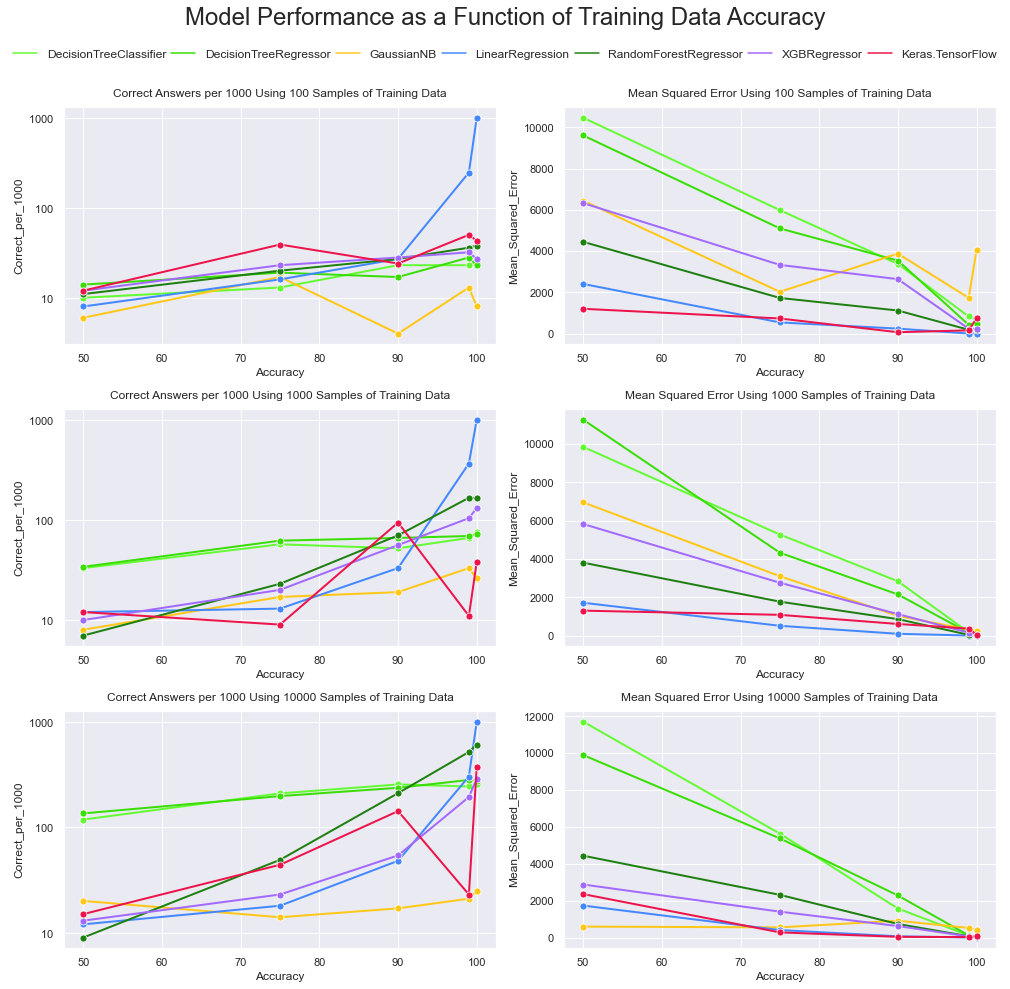

In [17]:
# Model Performance as a Function of Training Data Accuracy
# Version 2 graphing using subplots and additional formatting

custom_palette = ['#64FB34', '#39de04', '#FFC818', '#4488FF', '#1E8011', '#A26AFF', '#EC144A']

figsize=(14, 14)
fig, axes = plt.subplots(3, 2, figsize=figsize)

fig.suptitle("Model Performance as a Function of Training Data Accuracy\n\n", fontsize=24)


# CORRECT ANSWERS
title = "Correct Answers per 1000 Using {} Samples of Training Data"

sample_size = 100
ax=axes[0,0]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(yscale='log')
ax.get_legend().remove()

sample_size = 1000
ax=axes[1,0]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(yscale='log')
ax.get_legend().remove()

sample_size = 10000
ax=axes[2,0]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(yscale='log')
ax.get_legend().remove()


# MEAN SQUARED ERROR
title = "Mean Squared Error Using {} Samples of Training Data"

sample_size = 100
ax=axes[0,1]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
ax.get_legend().remove()

sample_size = 1000
ax=axes[1,1]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
ax.get_legend().remove()

sample_size = 10000
ax=axes[2,1]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
ax.get_legend().remove()

# one legend to rule them all
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', mode="expand", bbox_to_anchor=(0, 0, 1, 0.95),
           ncol=7, fontsize=12, borderpad=0.5, frameon=False)

# plot in tight layout
fig.tight_layout()

# save the image
plt.savefig('performance_v_accuracy.png', facecolor='w')


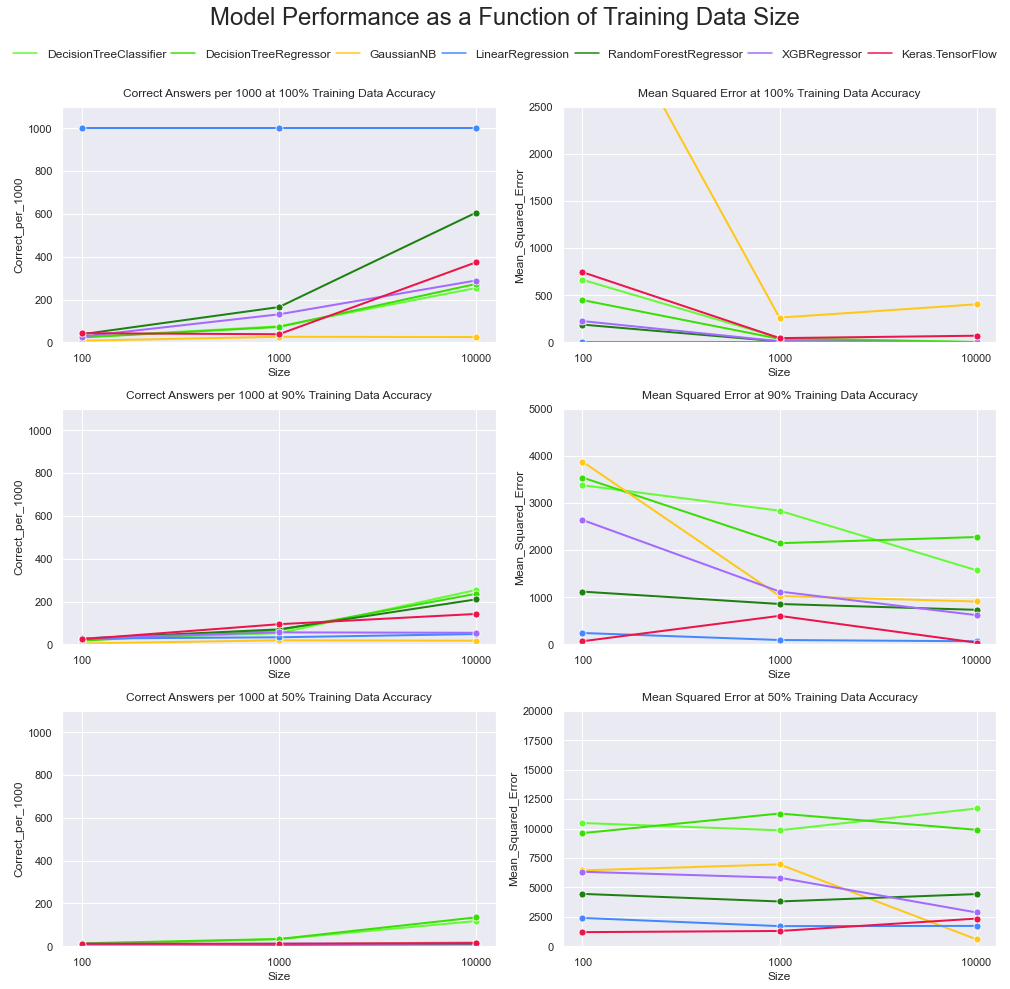

In [18]:
# Model Performance as a Function of Training Data Size
# Version 2 graphing using subplots and additional formatting

figsize=(14, 14)
fig, axes = plt.subplots(3, 2, figsize=figsize)

fig.suptitle("Model Performance as a Function of Training Data Size\n\n", fontsize=24)


# CORRECT ANSWERS
title = "Correct Answers per 1000 at {}% Training Data Accuracy"

ylim=(0, 1100)

training_accuracy = 100
ax=axes[0,0]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=ylim)
plot.set(xscale='log')
ax.get_legend().remove()

training_accuracy = 90
ax=axes[1,0]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=ylim)
plot.set(xscale='log')
ax.get_legend().remove()

training_accuracy = 50
ax=axes[2,0]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=ylim)
plot.set(xscale='log')
ax.get_legend().remove()


# MEAN SQUARED ERROR
title = "Mean Squared Error at {}% Training Data Accuracy"

training_accuracy = 100
ax=axes[0,1]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=(0, 2500))
plot.set(xscale='log')
ax.get_legend().remove()

training_accuracy = 90
ax=axes[1,1]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=(0, 5000))
plot.set(xscale='log')
ax.get_legend().remove()

training_accuracy = 50
ax=axes[2,1]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=(0, 20000))
plot.set(xscale='log')
ax.get_legend().remove()

# one legend to rule them all
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', mode="expand", bbox_to_anchor=(0, 0, 1, 0.95),
           ncol=7, fontsize=12, borderpad=0.5, frameon=False)

# plot in tight layout
fig.tight_layout()

# save the image
plt.savefig('performance_v_size.png', facecolor='w') 


# How Did I Do?
Checking predictions on individual sets of numbers.

In [19]:
# how did I do?

def how_did_i_do(model, a_test, b_test):
    try:  # tensorflow
        guess = predict_model(model, [[a_test, b_test]])[0][0]
    except:
        guess = predict_model(model, [[a_test, b_test]])[0]

    print(f"I am {get_name_of_model(model)}.\nI think that {a_test} + {b_test} = {guess:0.2f}\nHow did I do?")


In [20]:
def test_how_i_did(trainingset_n, model_n, a_test, b_test):
    current_training_set = training_sets[trainingset_n]
    current_train_model = list_of_models[model_n]
#     print(f"I was trained using {training_sets[trainingset_n]}.")
    how_did_i_do(train_model(current_train_model, current_training_set), a_test, b_test)
    print()
    

In [21]:
test_how_i_did(12, 5, 7, 6)

I am XGBRegressor.
I think that 7 + 6 = 12.21
How did I do?



In [22]:
def how_did_all_models_do(test_set, a_test, b_test):
    current_training_set = training_sets[test_set]

    print(current_training_set, "\n")
    
    for i in range(len(list_of_models)):
        test_how_i_did(test_set, i, a_test, b_test)


In [23]:
how_did_all_models_do(10, 3, 4)

10000 training numbers at 100% accuracy 

I am DecisionTreeClassifier.
I think that 3 + 4 = 6.00
How did I do?

I am DecisionTreeRegressor.
I think that 3 + 4 = 6.00
How did I do?

I am GaussianNB.
I think that 3 + 4 = 25.00
How did I do?

I am LinearRegression.
I think that 3 + 4 = 7.00
How did I do?

I am RandomForestRegressor.
I think that 3 + 4 = 6.71
How did I do?

I am XGBRegressor.
I think that 3 + 4 = 8.57
How did I do?

I am Keras.TensorFlow.
I think that 3 + 4 = 6.65
How did I do?



In [24]:
how_did_all_models_do(3, 3, 4)

100 training numbers at 75% accuracy 

I am DecisionTreeClassifier.
I think that 3 + 4 = 19.00
How did I do?

I am DecisionTreeRegressor.
I think that 3 + 4 = 19.00
How did I do?

I am GaussianNB.
I think that 3 + 4 = 22.00
How did I do?

I am LinearRegression.
I think that 3 + 4 = -4.89
How did I do?

I am RandomForestRegressor.
I think that 3 + 4 = 5.66
How did I do?

I am XGBRegressor.
I think that 3 + 4 = 11.76
How did I do?

I am Keras.TensorFlow.
I think that 3 + 4 = 4.00
How did I do?



# Visualisation: Scatterplot of Training vs Prediction

In [25]:
def prediction_output(model, n_tests):
    test_set = TestMe(n_tests)
    y_predict = predict_model(model, test_set)
    return np.column_stack((test_set, y_predict))


In [26]:
def scatterplot_accuracy(dataset, **kwargs):
    '''
    plots predicted vs correct as a scatterplot
    test x1 + x2 = y, plot predictions vs y_actual
    '''

    # print(dataset)  # this only works with classes w __str__ (AddMe)

    correct_plot = [sublist[0] + sublist[1] for sublist in dataset]
    predict_plot = [sublist[2] for sublist in dataset]

    plot = sns.scatterplot(x=correct_plot, y=predict_plot, **kwargs)
    plot.set(ylim=(-200, 200))
    

In [27]:
def grid_of_scatterplots(training_set_list, list_of_training_models, n_tests):
    
    figsize = (20, 30)
    no_sets = len(training_set_list)
    no_models = len(list_of_training_models) + 1
    
    fig, axes = plt.subplots(no_models, no_sets, figsize=figsize)
    
    fig.suptitle("Scatterplots of Predicted vs Correct Answers\n", fontsize=42)
    
    ax_y = 0
    
    for training_set in training_set_list:
        
        current_training_set = training_sets[training_set]
        ax_x = 0
        ax=axes[ax_x, ax_y]
        ax.set_title(current_training_set, fontsize=16)
        
        # training set plot
        training_set_to_plot = current_training_set
        
        plot = scatterplot_accuracy(training_set_to_plot, color=".5", s=20, ax=ax)
        
        ax_x +=1

        # plot all tests
        for current_model in list_of_training_models:
            ax=axes[ax_x, ax_y]
            
            current_test_model = train_model(current_model, current_training_set)
            set_to_plot = prediction_output(current_test_model, n_tests)
            plot = scatterplot_accuracy(set_to_plot, s=20, ax=ax)
            ax.set_title(get_name_of_model(current_model), fontsize=16)
            
            ax_x +=1
            
        ax_y +=1
        
    # plot in tight layout
    fig.tight_layout()


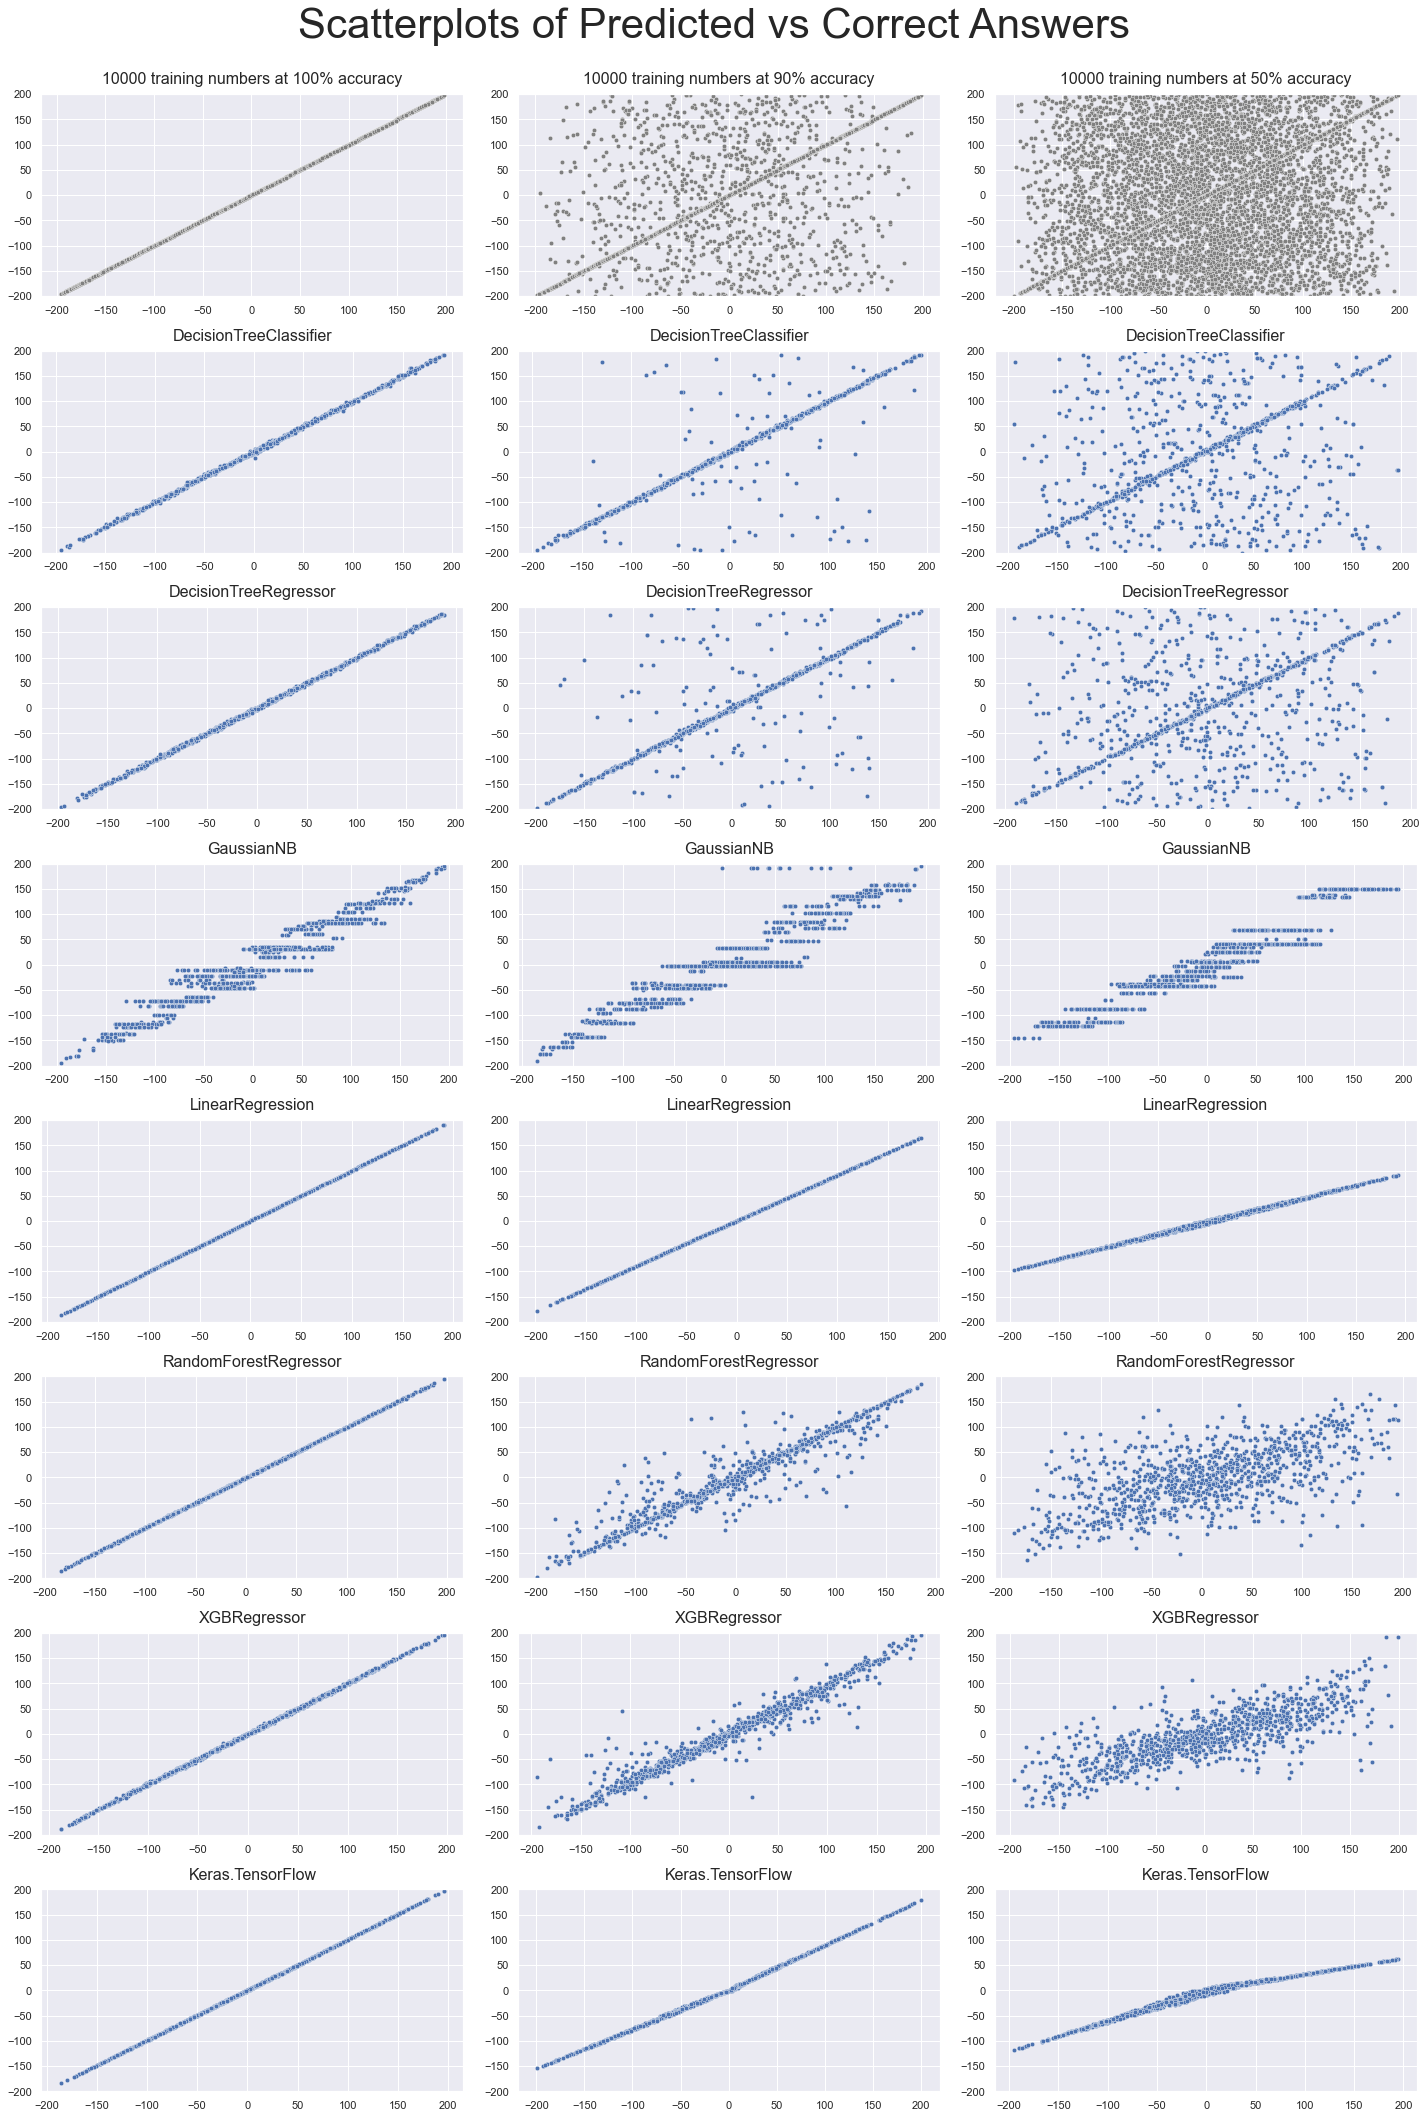

In [28]:
sets_to_plot = [10, 12, 14]
grid_of_scatterplots(sets_to_plot, list_of_models, 1000)
plt.savefig('predictions_10k_samples.png', facecolor='w') 

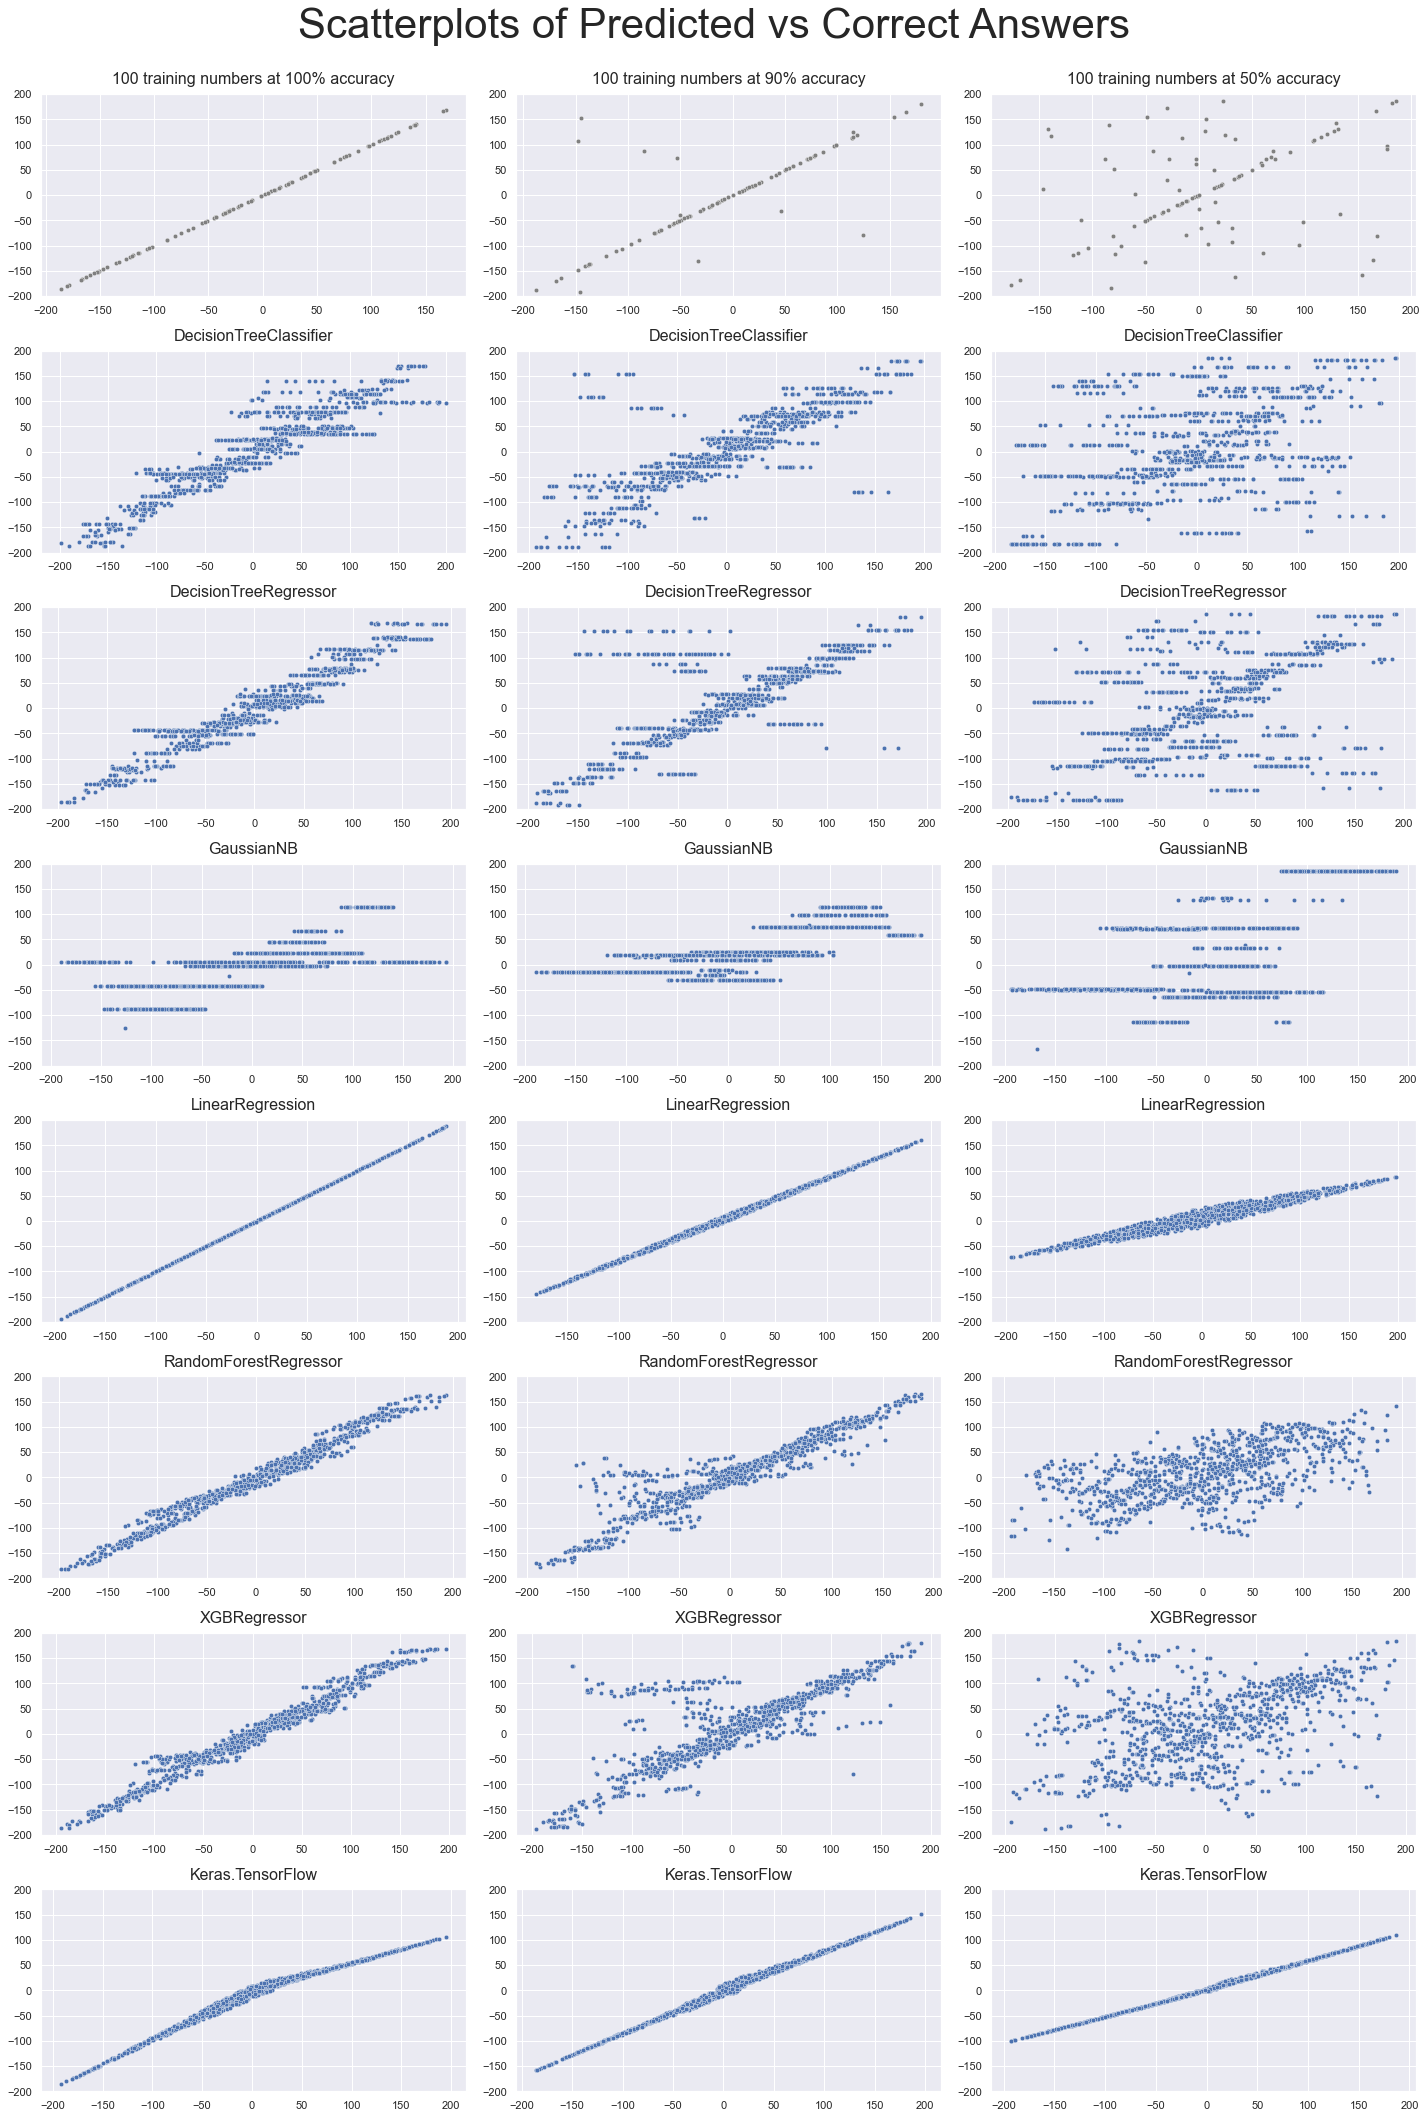

In [29]:
sets_to_plot = [0, 2, 4]
grid_of_scatterplots(sets_to_plot, list_of_models, 1000)
plt.savefig('predictions_100_samples.png', facecolor='w') 

# Predictions Grid Visualisation

In [30]:
def prediction_grid(trainingset_n, model_n, grid_min, grid_max):
    '''
    plot of a grid with predictions
    '''

    current_training_set = training_sets[trainingset_n]
    current_train_model = list_of_models[model_n]

    # trained model to use for grid construction
    current_test_model = train_model(current_train_model, current_training_set)

    grid = []
    row = []

    for i in range(grid_min, grid_max + 1, 1):
        row = []
        for j in range(grid_min, grid_max + 1, 1):
            temp_prediction = predict_model(current_test_model, [[i, j]])
            try:
                row.append(temp_prediction[0][0])
            except:
                row.append(temp_prediction[0])
        grid.append(row)

    return grid

In [31]:
def heatmap_grid(trainingset_n, model_n, grid_min, grid_max, **kwargs):
    figsize=(6, 6)
    grid = pd.DataFrame(prediction_grid(trainingset_n, model_n, grid_min, grid_max))
    plt.figure(figsize=figsize)
        
    plot = sns.heatmap(grid, cmap='Blues', annot=True, fmt='.0f', linewidths=.5, 
                       vmin=0, vmax=20, cbar=False, **kwargs);  # vmin and vmax need to be updated with pridiction grid
    plot.set_title(get_name_of_model(list_of_models[model_n]), fontsize=18)
    plot.set_xlabel('To This Value')
    plot.set_ylabel('Add This Value')
    plt.tight_layout()


In [32]:
def grid_of_heatmap_grids(list_training_set_num, list_of_model_num, min_num=0, max_num=10):
    '''
    defaults to grid of 0 to 10 (matches with default color pallete above)
    '''
    figsize = (15, 37)  # 3x7 aspect ratio, plus title
    num_rows = len(list_of_model_num)
    num_cols = len(list_training_set_num)
    ax_x, ax_y = 0, 0
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    fig.suptitle("Heatmaps of Predicted vs Correct Answers\n\n", fontsize=28)
    
    # Grid of Plots
    for set_number in list_training_set_num:
        ax_x = 0
        
        for model_number in list_of_model_num:
            ax = axes[ax_x, ax_y]

            grid = pd.DataFrame(prediction_grid(set_number, model_number, min_num, max_num))

            plot = sns.heatmap(grid, cmap='Blues', annot=True, fmt='.0f', linewidths=.5, 
                   vmin=0, vmax=20, cbar=False, ax=ax);  # vmin and vmax need to be updated with pridiction grid
            plot.set_title(get_name_of_model(list_of_models[model_number]), fontsize=18)
            plot.set_xlabel('To This Value')
            plot.set_ylabel('Add This Value')
            plt.tight_layout()
            
            ax_x += 1
        
        ax_y += 1
        
    # Legend
    plt.subplots_adjust(top=0.91)
    cax = plt.axes([0.04, 0.95, 0.95, 0.015])  # x, y, width, height
    mappable = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=20), cmap='Blues')
    cbar = plt.colorbar(mappable, cax=cax, orientation='horizontal')
    ticklabs = cbar.ax.get_yticklabels()
    cbar.ax.set_yticklabels(ticklabs, fontsize=14)
    
    
    # Subtitles = training set information
    # there is probably a better way to add these lables
        
    title1 = training_sets[list_training_set_num[0]]
    title2 = training_sets[list_training_set_num[1]]
    title3 = training_sets[list_training_set_num[2]]
    
    # temporarily set padding for titles
    plt.rcParams['axes.titlepad'] = -85  # pad is in points...
    
    plt.title(title1, fontsize=18, loc="left")
    plt.title(title2, fontsize=18, loc="center")
    plt.title(title3, fontsize=18, loc="right")
    
    # reset to project defaults
    plt.rcParams['axes.titlepad'] = 10    # default is actually 6  


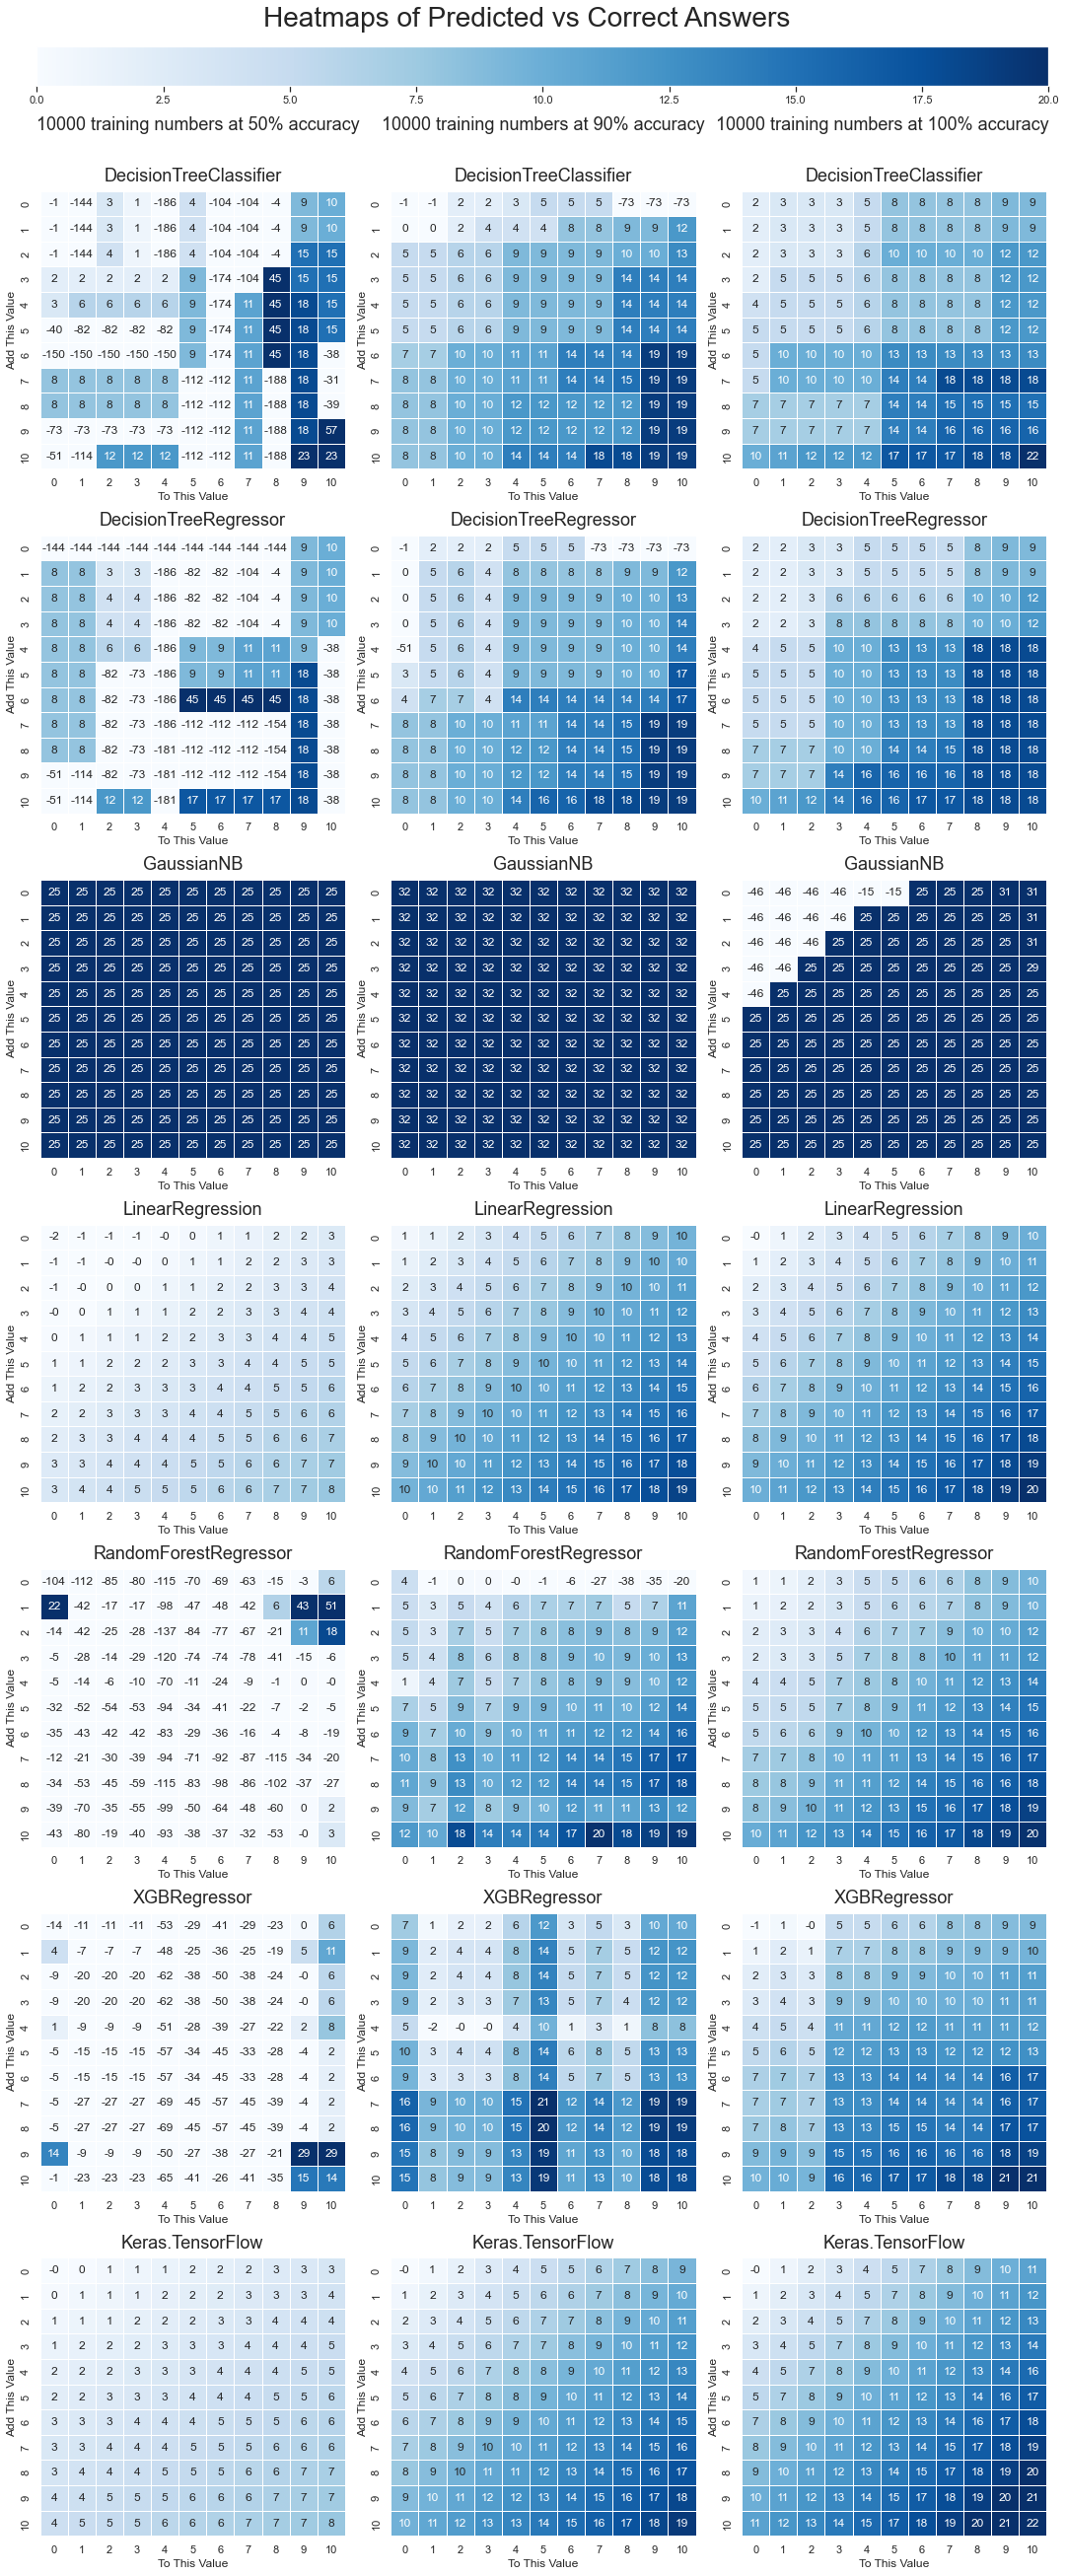

In [33]:
training_set_list = [14, 12, 10]
model_num_list = [0, 1, 2, 3, 4, 5, 6]

grid_of_heatmap_grids(training_set_list, model_num_list)

# save the image
plt.savefig('heatmaps_of_predictions.png', facecolor='w') 